# Final Project

This final project will focus on pipeline incident data.

Specifically, this data presents details of pipeline incidents, as defined by the Onshore Pipeline Regulations and Processing Plant regulations, including cause information. The data ranges from 2008 to current; it is updated quarterly.

Our team will be focusing on a couple key areas within this dataset

1. Heatmap of incidents in Canada
2. Bar graph of the different types of incidents
3. Fatalities
4. Map of sources of explosion / fire
5. Relation between maintenance  and time to incidents



Name: Connor Logan

Student ID: 190209360

Imports

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pytz
from shapely.geometry import Point

Viewing the Dataframe

In [7]:
#loading in the dataset
df = pd.read_csv('data/pipeline-incidents-comprehensive-data.csv', encoding='iso-8859-1')

#looking into the dataframe
pd.set_option('display.max_columns', None)
df.head()

,Incident Number,Incident Types,Reported Date,Nearest Populated Centre,Province,Company,Status,Latitude,Longitude,Approximate Volume Released (m3),Substance,Release Type,Significant,Year,Occurrence Date and Time,Discovered Date and Time,Detailed what happened,What happened category,Detailed why it happened,Why it happened category,Duration of interruption of pipeline operations,Pipeline or Facility Type,Activity being performed at time of incident,How the incident was discovered,Closed Date,Pipeline or facility equipment involved,Rupture,Incident type,Released substance type,Released volume (m3),Pipe body release,Residual effects on the environment,Source of Explosion,Source of Fire,Activity at time of fatality,Number of fatalities,Type of Injury,Number of individuals injured,Workdays lost,Work restricted by injury,Conditions that resulted in the operation beyond limits,Conditions that resulted in adverse effects on the environment,Number of people evacuated,Regulation,Pipeline Name,Pipeline outside diameter (NPS),Pipeline length (km),Substance carried,Facility Name,Facility Type,Facility latitude,Facility longitude,Country,Affects Company Property,Off Company Property,Affects Pipeline right-of-way,Affects off Pipeline right-of-way,Land Use,Population Density,Kilometre post,Emergency Level,Investigation Type,Was NEB Staff Deployed,Related NEB event number,Equipment or component involved,Design standard,Nominal pipe size,Material,Material grade,Schedule,Design wall thickness (mm),Custom design wall thickness (mm),Actual wall thickness (mm),Licensed maximum operating pressure (kPa),Restricted operating pressure (kPa),Actual operating pressure at time of failure (kPa),Designed depth of cover (m),Actual depth of cover (m),Year of manufacture,Year of installation,Year when put into service,Most recent cathodic protection reading at incident site (mV vs. Cu/CuSO4),Weld type,Seam type,Seam joining method,Seam clock position,Coating location,Coating type,Coating condition,Application method,Year when the coating was applied,Insulation installed,Repair type,Repair date,Equipment or component has never been inspected,Most recent inspection date for the failed equipment or component,Type of most recent inspection,Most recent inspection part of the routine inspection program,No maintenance done on this equipment or component,Date of the most recent maintenance work for the failed equipment or component,Most recent maintenance Type,Most recent maintenance work part of the routine maintenance program
0,INC2007-097,Release of Substance,01/02/2008,Grande Prairie,Alberta,Alliance Pipeline Ltd.,Closed,54.84000,-118.650000,Not Provided,Natural Gas - Sweet,Gas,No,2008,2007/12/27 02:00:00 PM Mountain,2007/12/27 02:00:00 PM Mountain,"Damage or deterioration mechanism, Cracking, C...",Corrosion and Cracking,"Job or system factors, Excessive wear and tear...",Maintenance,NaN,Transmission,Operation,NaN,2012/07/23,No,No,Release of Substance,Natural Gas - Sweet,0.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,OPR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,Yes,No,No,No,Unknown Land Use (Historical Data Migration),Unknown Population Density (Historical Data Mi...,NaN,Level I,Standard Review - 168 days,No,NaN,"Station/Facility, Compression, Pipe",NaN,NPS 3/4,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Replacement,2007-12-27,No,NaN,NaN,No,No,2007-12-27,Replacement,No
1,INC2008-001,Release of Substance,01/02/2008,Cromer,Manitoba,Enbridge Pipelines Inc.,Closed,49.75300,-101.239000,8.0000,Crude Oil - Sweet,Liquid,No,2008,2008/01/02 11:30:00 AM Central,2008/01/02 11:30:00 AM Central,"Damage or deterioration mechanism, Material Lo...",Corrosion and Cracking,"Job or system factors, Inadequate maintenance,...",Maintenance,NaN,NaN,Operation,Employee / Contractor (Onsite),2011/01/11,Yes,No,Release of Substance,Crude Oil - Sweet,8.0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,OPR,NaN,NaN,NaN,NaN,Cromer,NaN,NaN

Heatmap of incidents

C:\Users\conno\AppData\Local\Temp\ipykernel_27324\3450864402.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)


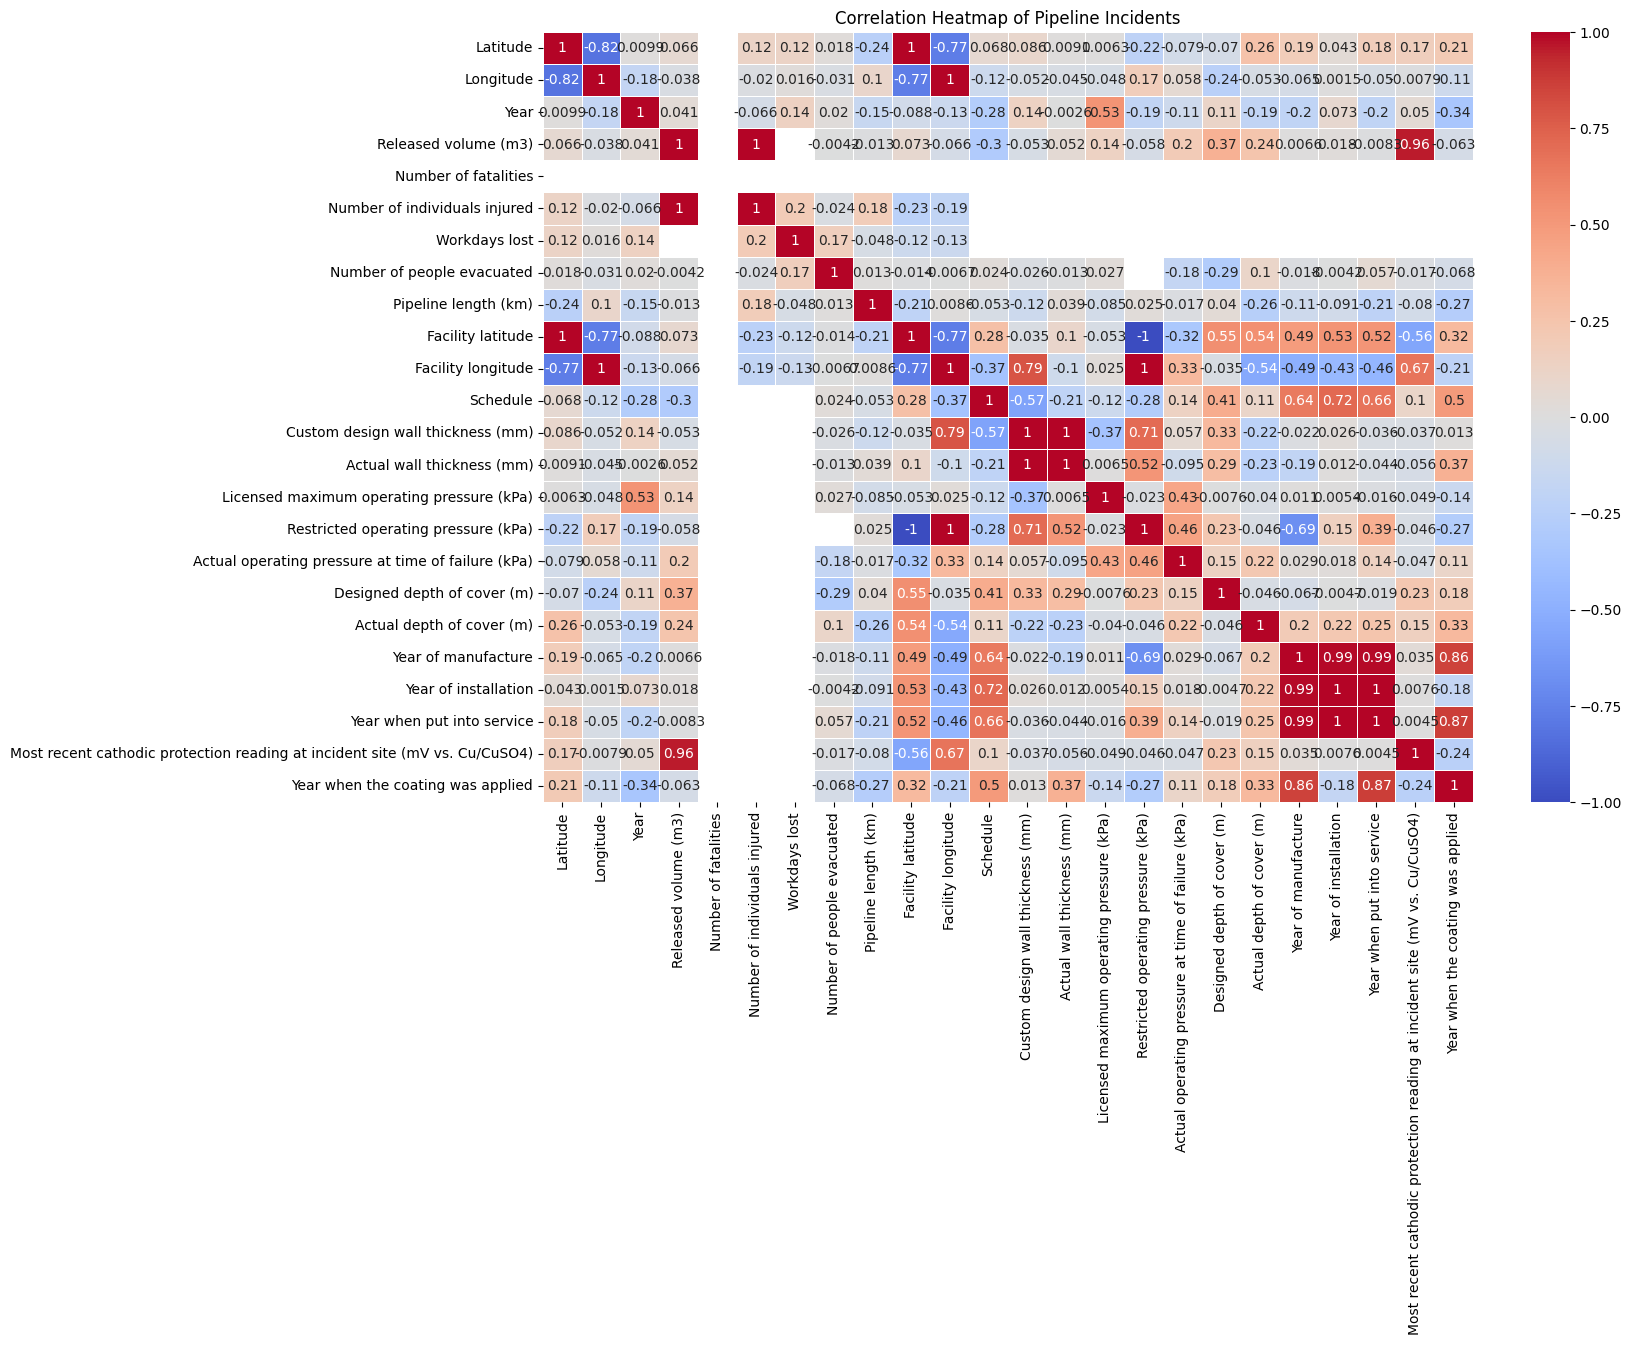

In [39]:
#could look nicer

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Pipeline Incidents')
plt.show()

Bar Graph of Different Types of Incidents

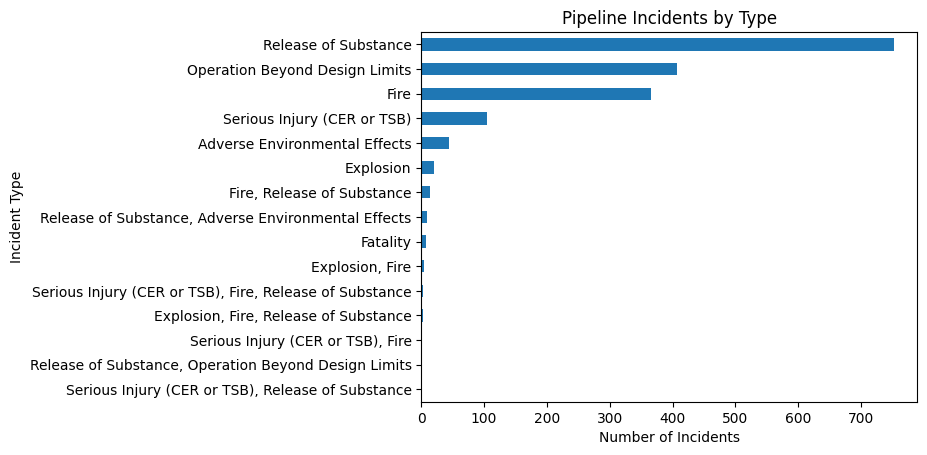

In [41]:
#bar graph
incident_counts = df['Incident Types'].value_counts().sort_values(ascending=True)

incident_counts.plot.barh()
plt.title('Pipeline Incidents by Type')
plt.xlabel('Number of Incidents')
plt.ylabel('Incident Type')
plt.show()

Fatalities Plot

In [43]:
# set plot style
sns.set_style('whitegrid')

# create bar chart
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Year', y='Number of fatalities', data=df, color='steelblue')

# add labels and title
plt.title('Pipeline Incident Fatalities by Year', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Number of Fatalities', fontsize=14, fontweight='bold', labelpad=10)

# set tick label font size
ax.tick_params(axis='both', labelsize=12)

# set y-axis limit
plt.ylim(0, 4)

# add data labels
for i, v in enumerate(df['Number of fatalities']):
    ax.text(i, v+0.2, str(v), color='black', fontweight='bold', ha='center', fontsize=12)

# remove top and right spines
sns.despine(top=True, right=True)

# show plot
plt.show()

C:\Users\conno\AppData\Roaming\Python\Python311\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\conno\AppData\Roaming\Python\Python311\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\conno\AppData\Roaming\Python\Python311\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\conno\AppData\Roaming\Python\Python311\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\conno\AppData\Roaming\Python\Python311\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,
C:\Users\conno\AppData\Roaming\Python\Python311\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sa

ValueError: Image size of 68659x584 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x600 with 1 Axes>

Map of Incidents

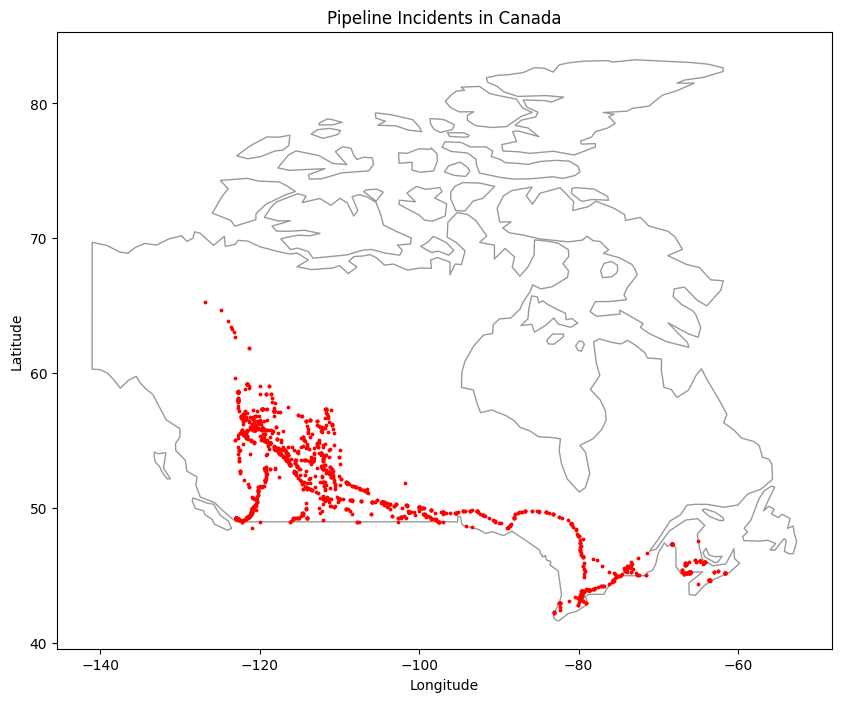

In [22]:
# Convert the longitude and latitude to a geopandas GeoDataFrame
geometry = gpd.points_from_xy(df.Longitude, df.Latitude)
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Create a basemap of Canada
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
canada = world[world.name == 'Canada']

# Plot the incidents on the basemap
fig, ax = plt.subplots(figsize=(10, 10))
canada.plot(ax=ax, alpha=0.4, color='white', edgecolor='black')
gdf.plot(ax=ax, markersize=3, color='red')

# Customize the plot
plt.title('Pipeline Incidents in Canada')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

Relation Between Maintenance and Incidents


In [36]:
#damian do this one please